In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit import pulse,schedule
from qiskit.pulse import Schedule

In [3]:
import matplotlib.pyplot as plt
import datetime
from qutip import Qobj, identity, sigmax, sigmay, sigmaz, sigmam, tensor
from qutip.superoperator import liouvillian, sprepost
from qutip.qip import hadamard_transform
from qutip.qip.operations.gates import rx,sqrtnot
import qutip.logging_utils as logging
logger = logging.get_logger()
#Set this to None or logging.WARN for 'quiet' execution
log_level = logging.INFO
#QuTiP control modules
import qutip.control.pulseoptim as cpo

importing the Hamiltonian parameters from qiskit

In [4]:
TOKEN = '023f373dc54c121ed029051e578c1c639af5bb83bbd20f56acdbbdfae0faf3782ff72329750d32853370939170a2ddf7785f1f31550186921b0351abf7cdb128'

IBMQ.save_account(TOKEN)
IBMQ.load_account()

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
configrc.store_credentials:WARNING:2021-06-05 10:47:20,891: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider =IBMQ.get_provider(hub='ibm-q-bnl', group='bnl-non-c2qa-pro', project='physics-guided-o')

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
backend = provider.get_backend('ibmq_bogota')

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
backend_defaults = backend.defaults(backend)
backend_config = backend.configuration()
assert backend_config.open_pulse, "Backend doesn't support Pulse"

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
props = backend.properties()

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# unit conversion factors -> all backend properties returned in SI (Hz, sec, etc)
GHz = 1.0e9 # Gigahertz
MHz = 1.0e6 # Megahertz
us = 1.0e-6 # Microseconds
ns = 1.0e-9 # Nanoseconds


/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
qubit = 2

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
w0 = backend_defaults.qubit_freq_est[qubit]/GHz

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
#The Hamiltoninan model
Sx = sigmax()
Sy = sigmay()
Sz = sigmaz()
Sm = sigmam()
Si = identity(2)

sx_gate = sqrtnot()

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
H0 = 0.5*w0*Sz
Hc = [Sx]#,Sy,Sz]

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
t1 = props.t1(qubit)
t2 = props.t2(qubit)

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
gamma1=(1/t1)/GHz
gamma2=(1/t2)/GHz

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
L0 = liouvillian(H0,[np.sqrt(gamma1)*Sm])

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
#sigma X control
LC_x = liouvillian(Sx)
#sigma Y control
LC_y = liouvillian(Sy)
#sigma Z control
LC_z = liouvillian(Sz)

#Drift
drift = L0
#Controls - different combinations can be tried
ctrls = [LC_x]#, LC_y, LC_z]
# Number of ctrls
n_ctrls = len(ctrls)

# start point for the map evolution
E0 = sprepost(Si, Si)

# target for map evolution
E_targ = sprepost(sx_gate, sx_gate)

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Time allowed for the evolution
evo_time = 230
# Number of time slots
n_ts = int(float(evo_time/0.222))
# Fidelity error target
fid_err_targ = 1e-3
# Maximum iterations for the optisation algorithm
max_iter = 1000
# Maximum (elapsed) time allowed in seconds
max_wall_time = 300
# Minimum gradient (sum of gradients squared)
# as this tends to 0 -> local minima has been found
min_grad = 1e-20
p_type = 'DRAG'
#Run optimization
#result = cpo.optimize_pulse(drift, ctrls, E0, E_targ, n_ts, evo_time,amp_lbound=0, amp_ubound=1, 
#                fid_err_targ=fid_err_targ, min_grad=min_grad, 
#                max_iter=max_iter, max_wall_time=max_wall_time, 
#                out_file_ext=None, init_pulse_type=p_type, 
#                log_level=log_level, gen_stats=True)
result=cpo.optimize_pulse_unitary(H0, Hc, Si, sx_gate, n_ts, evo_time,
                             amp_lbound=0,amp_ubound=1,
                fid_err_targ=fid_err_targ, min_grad=min_grad, 
                max_iter=max_iter, max_wall_time=max_wall_time, 
                out_file_ext=None, init_pulse_type=p_type, 
                log_level=log_level, gen_stats=True)
result.stats.report()
print("Final evolution\n{}\n".format(result.evo_full_final))
print("********* Summary *****************")
print("Initial fidelity error {}".format(result.initial_fid_err))
print("Final fidelity error {}".format(result.fid_err))
print("Final gradient normal {}".format(result.grad_norm_final))
print("Terminated due to {}".format(result.termination_reason))
print("Number of iterations {}".format(result.num_iter))
print("Completed in {} HH:MM:SS.US".format(datetime.timedelta(seconds=result.wall_time)))

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
INFO:qutip.control.dynamics:Setting memory optimisations for level 0
INFO:qutip.control.dynamics:Internal operator data type choosen to be <class 'numpy.ndarray'>
INFO:qutip.control.dynamics:phased dynamics generator caching True
INFO:qutip.control.dynamics:propagator gradient caching True
INFO:qutip.control.dynamics:eigenvector adjoint caching True
INFO:qutip.control.dynamics:use sparse eigen decomp False
INFO:qutip.control.pulseoptim:System configuration:
Drift Hamiltonian:
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 2.39146281  0.        ]
 [ 0.   


------------------------------------
---- Control optimisation stats ----
**** Timings (HH:MM:SS.US) ****
Total wall time elapsed during optimisation: 0:00:00.981275
Wall time computing Hamiltonians: 0:00:00.030202 (3.08%)
Wall time computing propagators: 0:00:00.688683 (70.18%)
Wall time computing forward propagation: 0:00:00.008827 (0.90%)
Wall time computing onward propagation: 0:00:00.008437 (0.86%)
Wall time computing gradient: 0:00:00.048747 (4.97%)

**** Iterations and function calls ****
Number of iterations: 3
Number of fidelity function calls: 8
Number of times fidelity is computed: 8
Number of gradient function calls: 7
Number of times gradients are computed: 7
Number of times timeslot evolution is recomputed: 8

**** Control amplitudes ****
Number of control amplitude updates: 7
Mean number of updates per iteration: 2.3333333333333335
Number of timeslot values changed: 6717
Mean number of timeslot changes per update: 959.5714285714286
Number of amplitude values changed: 67

# Qiskit part

In [19]:
x = result.final_amps.T[0]
#y = result.final_amps.T[1]
#z = result.final_amps.T[2]

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
from qiskit.pulse import (Acquire, AcquireChannel, ControlChannel, Delay, 
                          DriveChannel, MeasureChannel, MemorySlot, Play,
                          Schedule, ShiftPhase, Waveform,build)

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
def get_closest_multiple_of_16(num):
    return int(num + 8 ) - (int(num + 8 ) % 16)    

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
Ncx = get_closest_multiple_of_16(len(x))
#Ncy = get_closest_multiple_of_16(len(y))
#Ncz = get_closest_multiple_of_16(len(z))

padded_pulsex = [0 for i in range(Ncx+16)]
#padded_pulsey = [0 for i in range(Ncy+16)]
#padded_pulsez = [0 for i in range(Ncz+16)]

#padded_pulsey[0:len(y)] = y
padded_pulsex[0:len(x)] = x
#padded_pulsez[0:len(z)] = z

with build(name='sx') as sx_q0:
    pulse.play(Waveform(padded_pulsex),DriveChannel(qubit))
    #pulse.play(Waveform(padded_pulsey),DriveChannel(qubit))
    #pulse.play(Waveform(padded_pulsez),DriveChannel(qubit))
    

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
cals = backend.defaults().instruction_schedule_map
basis_gates = backend_config.basis_gates
basis_gates += ['my_1q']
cals.add('my_1q',(qubit),sx_q0)

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
from qiskit.circuit import Gate
sx1 = Gate('my_1q',num_qubits=1,params=[])


/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


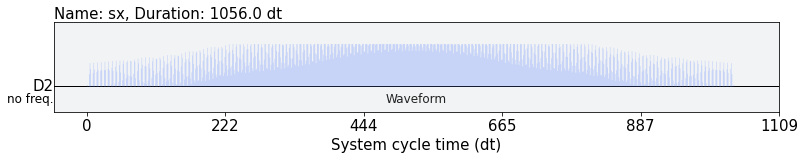

In [25]:
cals.get('my_1q',[qubit]).draw()

# Error Mitigation

In [27]:
# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
qr = QuantumRegister(4)
qubit_list=[qubit]
meas_calibs, state_labels = complete_meas_cal(qubit_list=qubit_list, qr=qr, circlabel='mcal')

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
job_mt = qiskit.execute(meas_calibs, backend=backend, shots=1000)
print(job_mt.job_id())

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


60bb9d7361f15fe3ccb9f77b


/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipywidgets/widgets/widget_layout.py:84: DeprecationWarning: Layout properties overflow_x and overflow_y have been deprecated and will be dropped in a future release. Please use the overflow shorthand property instead
  warnings.warn("Layout properties overflow_x and overflow_y have been deprecated and will be dropped in a future release. Please use the overflow shorthand property instead", DeprecationWarning)


In [30]:
# The calibration matrix without noise is the identity matrix
meas_fitter = CompleteMeasFitter(job_mt.result(), state_labels, circlabel='mcal')
print(meas_fitter.cal_matrix)

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[0.992 0.028]
 [0.008 0.972]]


# Results w/o error mitigation

In [39]:
qr = QuantumRegister(qubit+1)
cr = qiskit.ClassicalRegister(qubit+1)
circ = QuantumCircuit(qr,cr)
circ.append(sx1,[qubit])
circ.rz(-np.pi/4,qubit)
circ.measure(qr[qubit],cr[0])
circ.draw()

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


q270_0: ────────────────────────
                                
q270_1: ────────────────────────
        ┌───────┐┌──────────┐┌─┐
q270_2: ┤ my_1q ├┤ RZ(-π/4) ├┤M├
        └───────┘└──────────┘└╥┘
  c3: 3/══════════════════════╩═
                              0

In [40]:
dt = backend.configuration().dt
from qiskit import transpile, schedule as build_schedule
tcirc = transpile(circ,backend,basis_gates)
schedule1 = schedule(tcirc, backend, inst_map=cals)

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


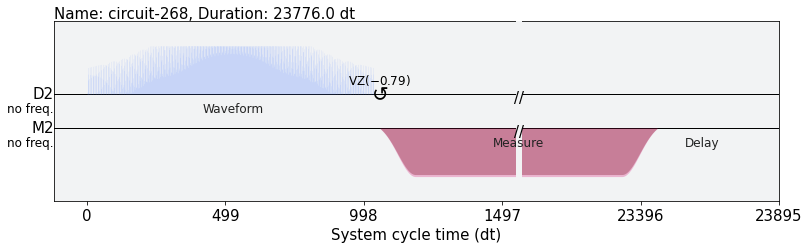

In [41]:
schedule1.draw()

In [46]:
from qiskit import execute

from qiskit.tools.monitor import job_monitor

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
sx_job = qiskit.execute([schedule1],backend,meas_level=2,shots=1048).result()

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipywidgets/widgets/widget_layout.py:84: DeprecationWarning: Layout properties overflow_x and overflow_y have been deprecated and will be dropped in a future release. Please use the overflow shorthand property instead
  warnings.warn("Layout properties overflow_x and overflow_y have been deprecated and will be dropped in a future release. Please use the overflow shorthand property instead", DeprecationWarning)


In [44]:
# Results without mitigation
raw_counts = sx_job.get_counts()



/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


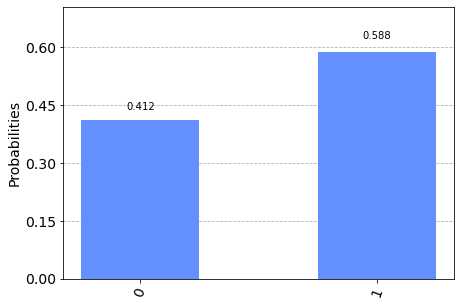

In [45]:
from qiskit.result.utils import marginal_counts
from qiskit.visualization import plot_histogram
plot_histogram(marginal_counts(raw_counts, [0,0], format_marginal=True))

In [ ]:
import qiskit
qiskit.__qiskit_version__

# QPT

In [31]:
import qiskit.quantum_info as qi
# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
import qiskit.ignis.mitigation.measurement as mc

# Auxiliary methods
from qiskit.quantum_info import Choi, Kraus
from qiskit.extensions import HGate, SGate

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
cr = qiskit.ClassicalRegister(3)
circ1 = QuantumCircuit(qr,cr)
circ1.append(sx1,[qubit])

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
target_unitary = qi.Operator(SGate())

qpt_circs = process_tomography_circuits(circ1,[qubit])

qpt_tcircs = transpile(qpt_circs,backend,basis_gates)

from qiskit.pulse.reschedule import align_measures
from qiskit.qobj import PulseQobj
from qiskit import assemble
qpt_schedules = align_measures(schedule(qpt_tcircs,backend=backend,inst_map=cals),inst_map=cals)

qobj = assemble(qpt_schedules,backend=backend,meas_level=2,shots=500)

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:465: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += preparation(prep_label[j], prep_qubits[j])
/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecate

In [34]:
job_qpt = backend.run(qobj)
print(job_qpt.job_id())

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-34-4f38b4c0586d>:1: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job_qpt = backend.run(qobj)


60bba20a27c8c81c6f5f28f8


/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipywidgets/widgets/widget_layout.py:84: DeprecationWarning: Layout properties overflow_x and overflow_y have been deprecated and will be dropped in a future release. Please use the overflow shorthand property instead
  warnings.warn("Layout properties overflow_x and overflow_y have been deprecated and will be dropped in a future release. Please use the overflow shorthand property instead", DeprecationWarning)


In [ ]:
qpt_result1=meas_fitter.filter.apply(job_qpt.result())

In [36]:
qpt_tomo = ProcessTomographyFitter(meas_fitter.filter.apply(job_qpt.result()), qpt_circs)
qpt_tomo.data

/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{(('Zp',), ('X',)): {'0': 221.99170039522375, '1': 278.0082996047762},
 (('Zp',), ('Y',)): {'0': 456.4315143604851, '1': 43.568485639514904},
 (('Zp',), ('Z',)): {'0': 156.6390130746988, '1': 343.36098692530123},
 (('Zm',), ('X',)): {'0': 246.88796721055428, '1': 253.1120327894457},
 (('Zm',), ('Y',)): {'0': 24.896277780696018, '1': 475.103722219304},
 (('Zm',), ('Z',)): {'0': 338.1742531629239, '1': 161.8257468370761},
 (('Xp',), ('X',)): {'0': 478.21576791823946, '1': 21.78423208176052},
 (('Xp',), ('Y',)): {'0': 250.00000057259055, '1': 249.99999942740936},
 (('Xp',), ('Z',)): {'0': 203.31947613837858, '1': 296.68052386162145},
 (('Yp',), ('X',)): {'0': 241.70124495351848, '1': 258.29875504648146},
 (('Yp',), ('Y',)): {'0': 137.96679589777068, '1': 362.0332041022293},
 (('Yp',), ('Z',)): {'0': 31.120333925358203, '1': 468.8796660746418}}

In [38]:
choi_fit_lstsq = qpt_tomo.fit(method='lstsq')
print('Average gate fidelity: F = {:.5f}'.format(qi.average_gate_fidelity(choi_fit_lstsq, target=target_unitary)))

Average gate fidelity: F = 0.44547


/Users/elishasiddiqui/.conda/envs/qutip_clone_test/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
